<a href="https://colab.research.google.com/github/jfcepeda97/DATASET_DESLIZAMIENTOS_Via-Aloag_Santo_Domingo/blob/master/Proyecto_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTAR LIBRERÍAS

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import os.path
from pathlib import Path
import shutil 
import cv2
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import torch
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#INICIALIZACIÓN DE TENSOR VACÍO (131,5,5,14)

In [59]:
inputs= np.empty((262, 5, 5, 14), dtype='float32')
bag= np.empty((262, 5, 5, 14), dtype='float32')

outputs = np.empty([262,1], dtype='float32')
print(inputs.shape)
print(outputs.shape)

(262, 5, 5, 14)
(262, 1)


#CARGA DE DATA Y STACKING DE IMÁGENES (14 VARIABLES)

In [60]:
from typing import List
Dataset = r'/content/drive/MyDrive/Deep Learning/DATASET' # Dirección general del DATASET
List_of_possibilities = os.listdir(Dataset) # Si deslizamiento / No deslizamiento
add = 0    
local = 0  

for your_possibilities_name in List_of_possibilities: # Accede a las carpetas del DATASET
  p=os.path.join(Dataset,your_possibilities_name)
  l=(str(p))
  Folder = l
  List_of_folder = os.listdir(Folder)

  local = local+1
  print(Folder)

  for your_folder_name in List_of_folder: # Accede a las subcarpetas (cada deslizamiento) del DATASET
    a=os.path.join(Folder,your_folder_name)
    b=(str(a))
    Carpeta = b
    #print(Carpeta)

    add = add+1

    List_of_files = os.listdir(Carpeta)

    sum=0
    for i in [1]:  # Para que las matrices sean definadas antes de ser apiladas
      for your_file_name in List_of_files: #Para acceder a cada imagen del DATASET
        c=os.path.join(Carpeta,your_file_name)
        d=(str(c))

        Archivo = d
        print(Archivo)

        sum=sum+1
        #print(sum)
        if sum == 1:
          v1 = Image.open(Archivo)
          v1array = np.array(v1)
        elif sum == 2:
          v2 = Image.open(Archivo)
          v2array = np.array(v2)
        elif sum == 3:
          v3 = Image.open(Archivo)
          v3array = np.array(v3)
        elif sum == 4:
          v4 = Image.open(Archivo)
          v4array = np.array(v4)
        elif sum == 5:
          v5 = Image.open(Archivo)
          v5array = np.array(v5)
        elif sum == 6:
          v6 = Image.open(Archivo)
          v6array = np.array(v6)
        elif sum == 7:
          v7 = Image.open(Archivo)
          v7array = np.array(v7)
        elif sum == 8:
          v8 = Image.open(Archivo)
          v8array = np.array(v8)
        elif sum ==9:
          v9 = Image.open(Archivo)
          v9array = np.array(v9)
        elif sum == 10:
          v10 = Image.open(Archivo)
          v10array = np.array(v10)
        elif sum == 11:
          v11 = Image.open(Archivo)
          v11array = np.array(v11)
        elif sum == 12:
          v12 = Image.open(Archivo)
          v12array = np.array(v12)
        elif sum == 13:
          v13 = Image.open(Archivo)
          v13array = np.array(v13)
        elif sum == 14:
          v14 = Image.open(Archivo)
          v14array = np.array(v14)
          
      if local==1:
        img = np.dstack((v1array, v2array, v3array, v4array, v5array, v6array, v7array, v8array, v9array, v10array, v11array, v12array, v13array, v14array))
      elif local==2:
        img = np.dstack((v1array, v11array, v9array, v12array, v10array, v2array, v4array, v5array, v14array, v10array, v6array, v3array, v8array, v7array))
      img = img.reshape((1,5,5,14))
      inputs[add-1] = img
      
  #print(inputs.shape)
  #print(inputs[130])
  
  if local==1:
    outputs[0:131]=1
  elif local==2:
    outputs[131:262]=0

print (inputs.shape)
print (outputs.shape)
print('----------------------')
print (outputs[:5])
print (outputs[131:136])



/content/drive/MyDrive/Deep Learning/DATASET/SÍ DESLIZAMIENTO
/content/drive/MyDrive/Deep Learning/DATASET/SÍ DESLIZAMIENTO/97/Aspect_97.tif
/content/drive/MyDrive/Deep Learning/DATASET/SÍ DESLIZAMIENTO/97/Channel Network Base Level_97.tif
/content/drive/MyDrive/Deep Learning/DATASET/SÍ DESLIZAMIENTO/97/Channet Network Distance_97.tif
/content/drive/MyDrive/Deep Learning/DATASET/SÍ DESLIZAMIENTO/97/Distance to faults_97.tif
/content/drive/MyDrive/Deep Learning/DATASET/SÍ DESLIZAMIENTO/97/Distance to roads_97.tif
/content/drive/MyDrive/Deep Learning/DATASET/SÍ DESLIZAMIENTO/97/Elevation_97.tif
/content/drive/MyDrive/Deep Learning/DATASET/SÍ DESLIZAMIENTO/97/Geology_97.tif
/content/drive/MyDrive/Deep Learning/DATASET/SÍ DESLIZAMIENTO/97/LS-Factor_97.tif
/content/drive/MyDrive/Deep Learning/DATASET/SÍ DESLIZAMIENTO/97/Plan_curvature_97.tif
/content/drive/MyDrive/Deep Learning/DATASET/SÍ DESLIZAMIENTO/97/Profile_curvature_97.tif
/content/drive/MyDrive/Deep Learning/DATASET/SÍ D

In [ ]:
print(outputs)

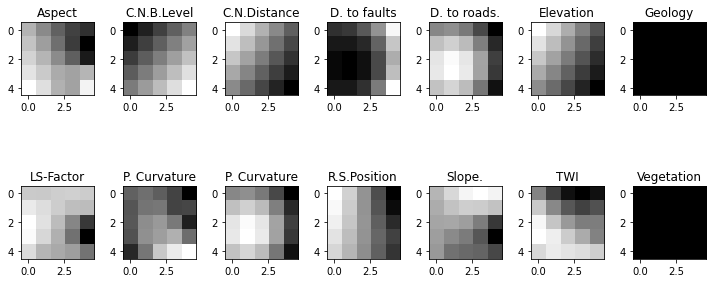

In [63]:
fig, ax = plt.subplots(2,7,figsize=(10,5))

q=261 #Posición dentro de los inputs, Carpeta_0 No Deslizamientos
ax[0,0].imshow(inputs[q,:,:,0], cmap='gray')
ax[0,0].set_title('Aspect')
ax[0,1].imshow(inputs[q,:,:,1], cmap='gray')
ax[0,1].set_title('C.N.B.Level')
ax[0,2].imshow(inputs[q,:,:,2], cmap='gray')
ax[0,2].set_title('C.N.Distance')
ax[0,3].imshow(inputs[q,:,:,3], cmap='gray')
ax[0,3].set_title('D. to faults')
ax[0,4].imshow(inputs[q,:,:,4], cmap='gray')
ax[0,4].set_title('D. to roads.')
ax[0,5].imshow(inputs[q,:,:,5], cmap='gray')
ax[0,5].set_title('Elevation')
ax[0,6].imshow(inputs[q,:,:,6], cmap='gray')
ax[0,6].set_title('Geology')
ax[1,0].imshow(inputs[q,:,:,7], cmap='gray')
ax[1,0].set_title('LS-Factor')
ax[1,1].imshow(inputs[q,:,:,8], cmap='gray')
ax[1,1].set_title('P. Curvature')
ax[1,2].imshow(inputs[q,:,:,9], cmap='gray')
ax[1,2].set_title('P. Curvature')
ax[1,3].imshow(inputs[q,:,:,10], cmap='gray')
ax[1,3].set_title('R.S.Position')
ax[1,4].imshow(inputs[q,:,:,11], cmap='gray')
ax[1,4].set_title('Slope.')
ax[1,5].imshow(inputs[q,:,:,12], cmap='gray')
ax[1,5].set_title('TWI')
ax[1,6].imshow(inputs[q,:,:,13], cmap='gray')
ax[1,6].set_title('Vegetation')
fig.tight_layout()
plt.show()

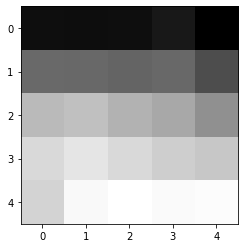

In [43]:
q=5
plt.imshow(inputs[q,:,:,7], cmap = "gray");

#RED CONVOLUCIONAL

##DEFINICIÓN DEL MODELO

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 3, 3, 32)          4064      
                                                                 
 conv2d_9 (Conv2D)           (None, 1, 1, 64)          18496     
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 26,785
Trainable params: 26,785
Non-trainable params: 0
_________________________________________________________________


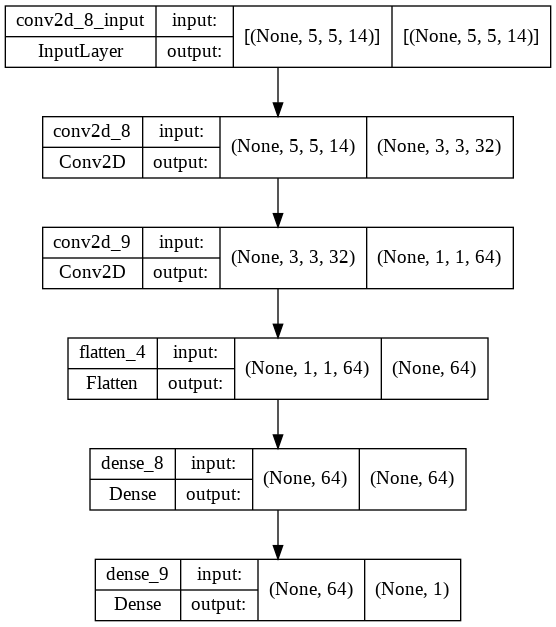

In [64]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(5, 5, 14)))
#model.add(MaxPool2D(strides=(2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

##DATA TRAIN_TEST_SPLIT

In [65]:
#Dividir data
from sklearn.model_selection import train_test_split
bag= np.empty((262, 5, 5, 14), dtype='float32')
outputs1 = np.empty([262,1], dtype='float32')
dic1t = {"x": list(inputs), "y":list(outputs)}
import pandas as pd
df = pd.DataFrame(dic1t)
df = df.sample(frac=1)
df = df.sample(frac=1)
print(list(df.y))
#df["x1"] = df.apply(lambda r: np.array(r["x"]), axis=1)
for i in range(len(df)):
  bag[i] =  np.array(df['x'][i])
  outputs1[i] = df["y"][i]


inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(bag, outputs1, test_size = 0.2)
#inputs_train, inputs_test = train_test_split(bolsa, test_size = 0.2)
#print(inputs_train[:10])
#print(outputs_train[:10])

[array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=float32), array([1.], dtype=float32), array([0.], dtype=float32), array([1.], dtype=f

In [34]:
#Dividir data
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size = 0.2)
#inputs_train, inputs_test = train_test_split(bolsa, test_size = 0.2)
#print(inputs_train[:10])
#print(outputs_train[:10])

In [66]:
print(inputs_train.shape)
print(outputs_train.shape)

(209, 5, 5, 14)
(209, 1)


##COMPILACIÓN DEL MODELO

In [67]:
import tensorflow as tf
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [68]:
hist = model.fit(inputs_train, outputs_train,
                 validation_data = (inputs_test, outputs_test),
                 epochs=100,
                 verbose=1)

Epoch 1/100
7/7 [==============================] - 1s 36ms/step - loss: 0.6742 - accuracy: 0.6029 - val_loss: 0.6061 - val_accuracy: 0.8491
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.5778 - accuracy: 0.8565 - val_loss: 0.4930 - val_accuracy: 0.8113
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.4053 - accuracy: 0.9091 - val_loss: 0.2991 - val_accuracy: 0.9245
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.2495 - accuracy: 0.9282 - val_loss: 0.2282 - val_accuracy: 0.9245
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.1928 - accuracy: 0.9522 - val_loss: 0.2484 - val_accuracy: 0.8868
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.1484 - accuracy: 0.9569 - val_loss: 0.2156 - val_accuracy: 0.9434
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.1284 - accuracy: 0.9665 - val_loss: 0.1922 - val_accuracy: 0.9623
Epoch 8/100
7/7 [======

In [78]:
# Guardar el Modelo
model.save('model.h5')

# Recrea exactamente el mismo modelo solo desde el archivo
new_model = keras.models.load_model('model.h5')

##PRECISIÓN Y PÉRDIDA DEL MODELO

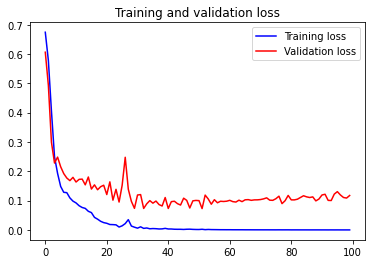

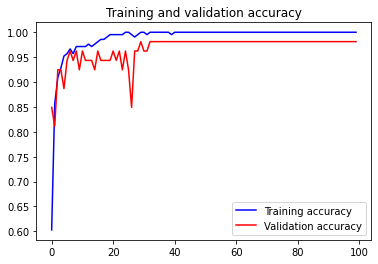

In [69]:
plt.figure(1)
plt.plot(hist.history['loss'], color='b', label = 'Training loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure(2)
plt.plot(hist.history['accuracy'], color='b', label = 'Training accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [82]:
#Modelo Guardado
model_F = load_model('model.h5')
predict = model_F.predict(inputs_test)
print(predict[:5])
print('---------')
print(outputs_test[:5])

[[9.9996626e-01]
 [9.9999809e-01]
 [9.9999988e-01]
 [2.8105421e-10]
 [3.5519856e-09]]
---------
[[1.]
 [1.]
 [1.]
 [0.]
 [0.]]


In [70]:
#Modelo de entrenamiento
predict = model.predict(inputs_test)
print(predict[:5])
print('---------')
print(outputs_test[:5])

[[9.9996626e-01]
 [9.9999809e-01]
 [9.9999988e-01]
 [2.8105421e-10]
 [3.5519856e-09]]
---------
[[1.]
 [1.]
 [1.]
 [0.]
 [0.]]


In [84]:
predict = model.predict(inputs_test)
rounded_predict = np.round(predict)
print(rounded_predict[:5])
print('-----------------')
print(outputs_test[:5])

[[1.]
 [1.]
 [1.]
 [0.]
 [0.]]
-----------------
[[1.]
 [1.]
 [1.]
 [0.]
 [0.]]


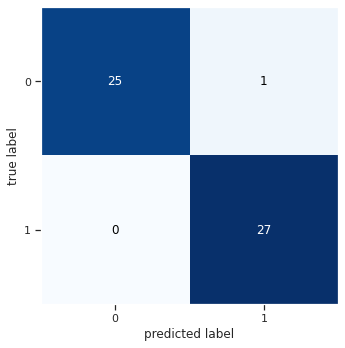

In [99]:
matc=confusion_matrix(outputs_test, rounded_predict)

plot_confusion_matrix(conf_mat=matc, figsize=(5,5), show_normed=False)
plt.tight_layout()

#Labels, No Deslizamientos = 0, Si Deslizamientos = 1

In [74]:
print(metrics.classification_report(outputs_test, rounded_predict, digits = 4))

              precision    recall  f1-score   support

         0.0     1.0000    0.9615    0.9804        26
         1.0     0.9643    1.0000    0.9818        27

    accuracy                         0.9811        53
   macro avg     0.9821    0.9808    0.9811        53
weighted avg     0.9818    0.9811    0.9811        53



In [75]:
score = model.evaluate(inputs_test, outputs_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2/2 [==============================] - 0s 7ms/step - loss: 0.1175 - accuracy: 0.9811
Test loss: 0.11752410978078842
Test accuracy: 0.9811320900917053
